In [182]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from math import pi
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

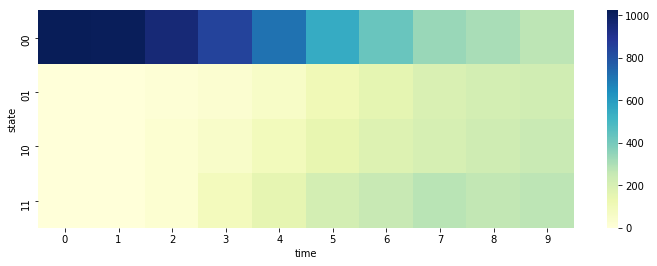

In [232]:
num = 0
time_steps = [0]
for i in range(10):
    num += 0.02
    time_steps.append(num)

time_range = [x for x in range(0,10)]

states = ['00', '01', '10', '11']

q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

df = pd.DataFrame(columns=['state', 'time', 'value'])

count = 0
for t, t_val in zip(time_steps, time_range):
    qc.u1(12*t, q[1])

    qc.h(q[0])
    qc.cx(q[1], q[0])
    qc.tdg(q[0])
    qc.cx(q[1], q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.h(q[1])

    qc.u1((-pi**2/4)*t, q[0])
    qc.u1((-pi**2/4)*t,q[1])
    qc.cx(q[1], q[0])
    qc.u1((-pi**2/2)*t, q[0])
    qc.cx(q[1], q[0])
    qc.u1((pi**2/2)*t, q[0])
    qc.u1((pi**2/2)*t, q[1])
    qc.h(q[1])

    qc.cx(q[1], q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.cx(q[1], q[0])
    qc.tdg(q[0])
    qc.tdg(q[1])
    qc.h(q[0])

    qc.h(q[0])
    qc.cx(q[1], q[0])
    qc.tdg(q[0])
    qc.cx(q[1],q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.h(q[1])

    qc.u1((-pi**2/4)*t, q[0])
    qc.u1((-pi**2/4)*t, q[1])
    qc.cx(q[1], q[0])
    qc.u1((-pi**2/2)*t, q[0])
    qc.cx (q[1], q[0])
    qc.u1((pi**2/2)*t, q[0])
    qc.u1((pi**2/2)*t, q[1])
    qc.h(q[1])

    qc.cx(q[1], q[0])
    qc.t(q[0])
    qc.t(q[1])
    qc.cx(q[1], q[0])
    qc.tdg(q[0])
    qc.tdg(q[1])
    qc.h(q[0])

    qc.u1(12*t, q[1])

    qc.measure(q[0], c[0])
    qc.measure(q[1], c[1])

    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()

    dicty = result_sim.get_counts(qc)
    
    for state in states:
        try:
            df.loc[count] = [state, t_val, dicty[state]]
        except KeyError:
            df.loc[count] = [state, t_val, 0]
        count += 1
            
df = df.pivot("state", "time", "value")
df = df[df.columns].astype(int)
plt.figure(figsize = (12, 4))
ax = sns.heatmap(df, cmap="YlGnBu")